<a href="https://colab.research.google.com/github/rushil2501/Heart-Disease-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong><em>PRML COURSE PROJECT</em></strong></h1>

<h2><strong><em>Importing the Required Libraries</em></strong></h2>


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB  
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as XGB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import multivariate_normal
import math
from sklearn import model_selection
import collections
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier

<h2><strong><em>Importing the dataset</em></strong></h2>

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/KartikChhipa01/datasets/main/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<h2><strong><em>Explanation of Columns in the dataset</strong></em></h1>

*   Age - age of the person in years
*   Sex - sex of the person (M: Male, F: Female)
*   ChestPainType - chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
* RestingBP: resting blood pressure (mm Hg)
* Cholesterol: serum cholesterol (mm/dl)
* FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
* RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
* MaxHR: maximum heart rate (Numeric value between 60 and 202)
* ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
* Oldpeak: oldpeak = ST (Numeric value measured in depression)
* ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
* HeartDisease: output class (1: heart disease, 0: Normal)






In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<h5>The dataset contains only non-null values so we do not need to preprocess the missing values<br>However the dtype of some columns need to be changed</h5>

In [ ]:
numeric_list=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
categorical_list=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

In [ ]:
data[categorical_list[:]]=data[categorical_list[:]].astype('category')

In [ ]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,1,508


<h2><strong><em>Exploratory Data Analysis</em></strong></h2>

In [ ]:
df_copy=data.copy()
df_copy['HeartDisease']=df_copy['HeartDisease'].map({1:'HeartDisease',0:'No HeartDisease'})
df_copy['Sex']=df_copy['Sex'].map({'M':'Male','F':'Female'})
fig1=px.sunburst(df_copy,path=['HeartDisease','Sex'],color='HeartDisease',color_discrete_map={'HeartDisease':'#0e2756',
'No HeartDisease':'#0853c5','Male':'#95d3ff','Female':'#e1f9ff'},title='Sex',width=400,height=400)
fig1.update_traces(textinfo='label+percent parent',name='Sex')
fig1.update_layout()
fig1.show()

In [ ]:
fig2=px.sunburst(df_copy,path=['HeartDisease','ExerciseAngina'],color='HeartDisease',color_discrete_map={'HeartDisease':'#0e2756',
'No HeartDisease':'#0853c5','Y':'#95d3ff','N':'#e1f9ff'},title='ExerciseAngina',width=400,height=400)
fig2.update_traces(textinfo='label+percent parent',name='ExerciseAngina')
fig2.update_layout()
fig2.show()

In [ ]:
df_copy['FastingBS']=df_copy['FastingBS'].astype('category')
fig3=px.sunburst(df_copy,path=['HeartDisease','FastingBS'],color='HeartDisease',color_discrete_map={'HeartDisease':
'#0e2756','No HeartDisease':'#0853c5','0':'#95d3ff','1':'#e1f9ff'},title='FastingBS',width=400,height=400)
fig3.update_traces(textinfo='label+percent parent',name='FastingBS')
fig3.update_layout()
fig3.show()

In [ ]:
fig4=px.histogram(df_copy,color='ST_Slope',x='HeartDisease',barmode='group',color_discrete_map={'Up':'#0e2756',
'Flat':'#0853c5','Down':'#088cff'},opacity=0.8,height=500,width=500,title='Heart Disease vs ST_Slope')
fig4.update_traces()
fig4.show()

In [ ]:
fig5=px.histogram(df_copy,color='HeartDisease',x='ChestPainType',barmode='group',color_discrete_map={'HeartDisease':'#0e2756',
'No HeartDisease':'#0853c5'},opacity=0.8,height=500,width=700,title='Chest Pain Type vs Heart Disease')
fig5.show()

In [ ]:
fig6=px.histogram(df_copy,color='RestingECG',x='HeartDisease',barmode='group',color_discrete_map={'Normal':'#0e2756',
'ST':'#0853c5','LVH':'#088cff'},opacity=0.8,width=500,height=500,title='Heart Disease vs RestingECG')
fig6.show()

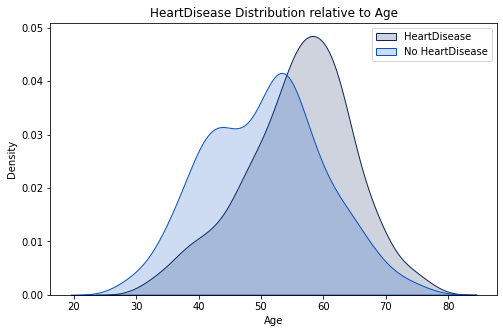

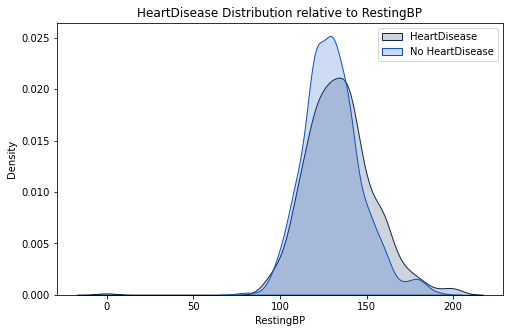

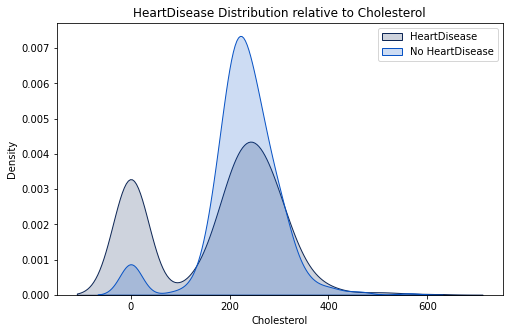

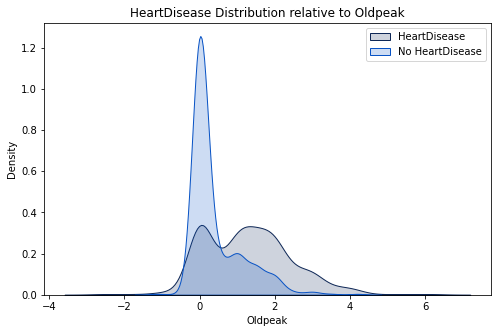

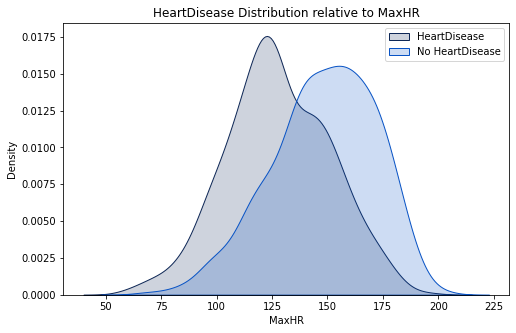

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['Age'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['Age'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to Age')
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=(8,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['RestingBP'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['RestingBP'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to RestingBP')
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=(8,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['Cholesterol'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['Cholesterol'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to Cholesterol')
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=(8,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['Oldpeak'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['Oldpeak'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to Oldpeak')
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=(8,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['MaxHR'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['MaxHR'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to MaxHR')
plt.legend()
plt.show()

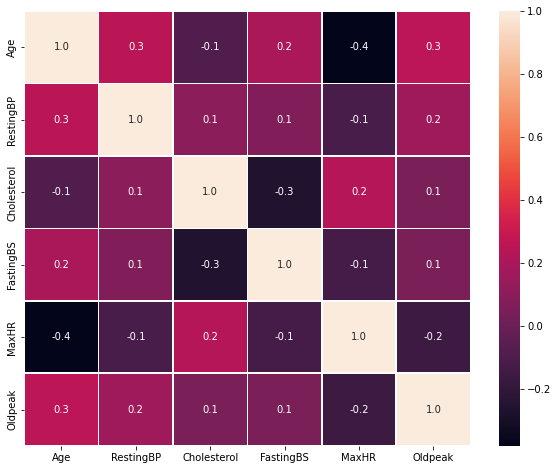

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data.loc[:,numeric_list].corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

<h2><strong><em>Identifying the outliers using Box Plot Analysis</em></strong></h2>

In [ ]:
fig7=px.histogram(df_copy['Cholesterol'],marginal='box',color_discrete_map={'Cholesterol':'#0e2756'},opacity=0.8,height=350,width=700)
fig7.show()
fig7=px.histogram(df_copy['Age'],marginal='box',color_discrete_map={'Age':'#0853c5'},opacity=0.8,height=350,width=650)
fig7.show()
fig7=px.histogram(df_copy['RestingBP'],marginal='box',color_discrete_map={'RestingBP':'#0e2756'},opacity=0.8,height=350,width=650)
fig7.show()
fig7=px.histogram(df_copy['MaxHR'],marginal='box',color_discrete_map={'MaxHR':'#0853c5'},opacity=0.8,height=350,width=650)
fig7.show()
fig7=px.histogram(df_copy['Oldpeak'],marginal='box',color_discrete_map={'Oldpeak':'#0e2756'},opacity=0.8,height=350,width=650)
fig7.show()

<h1><strong><em>Removing the outliers</em></strong></h1>

In [ ]:
data_eda=data[data.Cholesterol!=0]
data_eda=data_eda[data_eda.RestingBP>80]
data_eda.shape

(746, 12)

In [ ]:
fig8=px.histogram(data_eda['RestingBP'],marginal='box',color_discrete_map={'RestingBP':'#0e2756'},opacity=0.8,height=400,width=650)
fig8.show()
fig8=px.histogram(data_eda['Cholesterol'],marginal='box',color_discrete_map={'Cholesterol':'#0e2756'},opacity=0.8,height=400,width=650)
fig8.show()

<h2><strong><em>One Hot Encoding the Categorical Column</strong></em></h2>

<h4>One hot encoding is performed because the categorical data is nominal</h4>

In [ ]:
df_eda = pd.get_dummies(data_eda, columns = categorical_list[:], drop_first = True)
df = pd.get_dummies(data, columns = categorical_list[:], drop_first = True)
print(data_eda.shape)
df_eda.head()

(746, 12)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease_1
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1,0
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0,1
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1,0


In [ ]:
print(df_eda.shape)
df.head()

(746, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease_1
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1,0
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0,1
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1,0


In [ ]:
y_eda=df_eda["HeartDisease_1"]
X_eda=df_eda.drop(columns=["HeartDisease_1"],axis=1)
y=df["HeartDisease_1"]
X=df.drop(columns=["HeartDisease_1"],axis=1)

In [ ]:
X_eda.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


<h2><strong><em>Scaling the Numerical Data using Min-Max Scaler</strong></em></h2>

In [ ]:
scaler=MinMaxScaler()
X_eda[numeric_list[:]]=scaler.fit_transform(X_eda[numeric_list[:]])
X[numeric_list[:]]=scaler.fit_transform(X[numeric_list[:]])
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,1,1,0,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,1,1,0,0,0,1,0,0,1
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,0,0,0,0,1,0,1,1,0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,1,0,1,0,1,0,0,0,1


In [ ]:
X_eda.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.444444,0.393822,0.0,0.774436,0.015873,1,1,0,0,1,0,0,0,1
1,0.428571,0.629630,0.183398,0.0,0.654135,0.174603,0,0,1,0,1,0,0,1,0
2,0.183673,0.351852,0.382239,0.0,0.218045,0.015873,1,1,0,0,0,1,0,0,1
3,0.408163,0.425926,0.249035,0.0,0.293233,0.253968,0,0,0,0,1,0,1,1,0
4,0.530612,0.537037,0.212355,0.0,0.398496,0.015873,1,0,1,0,1,0,0,0,1


<h2><strong><em>Splitting the dataset into training and testing dataset</strong></em></h2>

In [ ]:
X_train_eda,X_test_eda,y_train_eda,y_test_eda=train_test_split(X_eda,y_eda,test_size=0.2,stratify=y_eda,random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

<h2><strong><em>Implementing Various Models</em></strong></h2>

# <h2><strong><em>Random Forest Classifier</em></strong></h2>




In [ ]:
seed_rfc=100

In [ ]:
params_rfc={
 "max_depth"        : [2,3,4,5,6,7,8,9,10,11,12],
 "n_estimators"     :[100,200,300,400,500,600,700,800,900,1000],
 "min_samples_split":[2,3,4,5,6,7,8],
 "min_samples_leaf":[1,2,3,4,5,6,7]
}

In [ ]:
classifier_rfc=RandomForestClassifier(random_state=seed_rfc)
random_search_rfc=RandomizedSearchCV(classifier_rfc,param_distributions=params_rfc,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_rfc.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_split=8, n_estimators=500,
                       random_state=100)

In [ ]:
rfc = random_search_rfc.best_estimator_
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict_proba(X_test)
acc_rfc= roc_auc_score(y_test,y_pred_rfc[:,1])
acc_rfc

0.942491630798661

In [ ]:
classifier_rfc_eda=RandomForestClassifier(random_state=seed_rfc)
random_search_rfc_eda=RandomizedSearchCV(classifier_rfc_eda,param_distributions=params_rfc,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search_rfc_eda.fit(X_train_eda,y_train_eda)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_rfc_eda.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=1000, random_state=100)

In [ ]:
rfc_eda = random_search_rfc_eda.best_estimator_
rfc_eda.fit(X_train_eda,y_train_eda)
y_pred_rfc_eda = rfc_eda.predict_proba(X_test_eda)
acc_rfc_eda= roc_auc_score(y_test_eda,y_pred_rfc_eda[:,1])
acc_rfc_eda

0.9567307692307693

# <h2><strong><em>KNeighbours Classifier</em></strong></h2>




In [ ]:
params_knc={
 "n_neighbors"        : [2,3,4,5,6,7,8,9,10],
 "weights"     :['uniform','distance','callable'],
 "leaf_size":[2,3,4,5,6,7,8],
 "p":[1,2,3]
}

In [ ]:
classifier_knc=KNeighborsClassifier()
random_search_knc=RandomizedSearchCV(classifier_knc,param_distributions=params_knc,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search_knc.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'leaf_size': [2, 3, 4, 5, 6, 7, 8],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance',
                                                    'callable']},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_knc.best_estimator_

KNeighborsClassifier(leaf_size=2, n_neighbors=7, weights='distance')

In [ ]:
knc = random_search_knc.best_estimator_
knc.fit(X_train,y_train)
y_pred_knc = knc.predict_proba(X_test)
acc_knc = roc_auc_score(y_test,y_pred_knc[:,1])
acc_knc

0.9072812051649928

In [ ]:
classifier_knc_eda=KNeighborsClassifier()
random_search_knc_eda=RandomizedSearchCV(classifier_knc_eda,param_distributions=params_knc,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search_knc_eda.fit(X_train_eda,y_train_eda)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'leaf_size': [2, 3, 4, 5, 6, 7, 8],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance',
                                                    'callable']},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_knc_eda.best_estimator_

KNeighborsClassifier(leaf_size=7, n_neighbors=8, p=3, weights='distance')

In [ ]:
knc_eda = random_search_knc_eda.best_estimator_
knc_eda.fit(X_train_eda,y_train_eda)
y_pred_knc_eda = knc_eda.predict_proba(X_test)
acc_knc_eda = roc_auc_score(y_test,y_pred_knc_eda[:,1])
acc_knc_eda

0.9262912482065997

# <h2><strong><em>Gradient Boosting Classifier</em></strong></h2>




In [ ]:
params_gbc={
 "n_estimators"        : [190,200,210,220,230],
 "learning_rate"     :[0.019,0.02,0.024,0.025,0.028],
 "max_depth": [2,3,5,4]
}

In [ ]:
classifier_gbc=GradientBoostingClassifier()
random_search_gbc=RandomizedSearchCV(classifier_gbc,param_distributions=params_gbc,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search_gbc.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.019, 0.02, 0.024,
                                                          0.025, 0.028],
                                        'max_depth': [2, 3, 5, 4],
                                        'n_estimators': [190, 200, 210, 220,
                                                         230]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_gbc.best_estimator_

GradientBoostingClassifier(learning_rate=0.02, n_estimators=210)

In [ ]:
gbc = random_search_gbc.best_estimator_
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict_proba(X_test)
acc_gbc = roc_auc_score(y_test,y_pred_gbc[:,1])
acc_gbc

0.9529531324725012

In [ ]:
classifier_gbc_eda=GradientBoostingClassifier()
random_search_gbc_eda=RandomizedSearchCV(classifier_gbc_eda,param_distributions=params_gbc,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search_gbc_eda.fit(X_train_eda,y_train_eda)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.019, 0.02, 0.024,
                                                          0.025, 0.028],
                                        'max_depth': [2, 3, 5, 4],
                                        'n_estimators': [190, 200, 210, 220,
                                                         230]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_gbc_eda.best_estimator_

GradientBoostingClassifier(learning_rate=0.019, max_depth=4, n_estimators=190)

In [ ]:
gbc_eda = random_search_gbc_eda.best_estimator_
gbc_eda.fit(X_train_eda,y_train_eda)
y_pred_gbc_eda = gbc_eda.predict_proba(X_test_eda)
acc_gbc_eda = roc_auc_score(y_test_eda,y_pred_gbc_eda[:,1])
acc_gbc_eda

0.9611823361823362

# <h2><strong><em>Gaussian Naive Bayes</em></strong></h2>




In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict_proba(X_test)
acc_gnb = roc_auc_score(y_test,y_pred_gnb[:,1])
acc_gnb

0.9282639885222381

In [ ]:
gnb_eda = GaussianNB()
gnb_eda.fit(X_train_eda, y_train_eda)
y_pred_gnb_eda = gnb_eda.predict_proba(X_test_eda)
acc_gnb_eda = roc_auc_score(y_test_eda,y_pred_gnb_eda[:,1])
acc_gnb_eda

0.9601139601139601

# <h2><strong><em>XGBoost Classifier</em></strong></h2>




In [ ]:
seed_xgb=100

In [ ]:
z=list(y_train).count(0)
o=list(y_train).count(1)

In [ ]:
acc_lst=[]
for i in range(1,11):
  model=XGB(learning_rate=0.1+0.01*i,n_estimators=100*i,max_depth=i,scale_pos_weight=z/o,gamma=i,subsample=0.1*i)
  model.fit(X_train,y_train)
  y_pred=model.predict_proba(X_test)
  accuracy=roc_auc_score(y_test,y_pred[:,1])
  acc_lst.append(accuracy)

In [ ]:
params_xgb={
 "learning_rate"    : [0.13,0.14,0.15,0.16,0.17],
 "max_depth"        : [2,3,4,5,6,7,8],
 "n_estimators"     :[600,620,640,650,580,560],
 "scale_pos_weight" :[z/o],
 "gamma"            :[5,6,7,8,9,10], 
 "subsample"        :[0.6,0.7,0.8,0.9],
}

In [ ]:
classifier_xgb=XGB(random_state=seed_xgb)
random_search_xgb=RandomizedSearchCV(classifier_xgb,param_distributions=params_xgb,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(random_state=100), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'gamma': [5, 6, 7, 8, 9, 10],
                                        'learning_rate': [0.13, 0.14, 0.15,
                                                          0.16, 0.17],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'n_estimators': [600, 620, 640, 650,
                                                         580, 560],
                                        'scale_pos_weight': [0.8078817733990148],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_xgb.best_estimator_

XGBClassifier(gamma=5, learning_rate=0.17, max_depth=6, n_estimators=620,
              random_state=100, scale_pos_weight=0.8078817733990148,
              subsample=0.9)

In [ ]:
xgb=random_search_xgb.best_estimator_
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict_proba(X_test)
acc_xgb=roc_auc_score(y_test,y_pred_xgb[:,1])
acc_xgb

0.9449426111908178

In [ ]:
classifier_xgb_eda=XGB(random_state=seed_xgb)
random_search_xgb_eda=RandomizedSearchCV(classifier_xgb_eda,param_distributions=params_xgb,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search_xgb_eda.fit(X_train_eda,y_train_eda)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(random_state=100), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'gamma': [5, 6, 7, 8, 9, 10],
                                        'learning_rate': [0.13, 0.14, 0.15,
                                                          0.16, 0.17],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'n_estimators': [600, 620, 640, 650,
                                                         580, 560],
                                        'scale_pos_weight': [0.8078817733990148],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_xgb_eda.best_estimator_

XGBClassifier(gamma=6, learning_rate=0.14, max_depth=7, n_estimators=600,
              random_state=100, scale_pos_weight=0.8078817733990148,
              subsample=0.8)

In [ ]:
xgb_eda=random_search_xgb_eda.best_estimator_
xgb_eda.fit(X_train_eda,y_train_eda)
y_pred_xgb_eda=xgb_eda.predict_proba(X_test_eda)
acc_xgb_eda=roc_auc_score(y_test_eda,y_pred_xgb_eda[:,1])
acc_xgb_eda

0.9642094017094017

# <h2><strong><em>Visualization of above results</em></strong></h2>




In [ ]:
auc_scores=[acc_rfc,acc_knc,acc_gbc,acc_gnb,acc_xgb]
auc_scores_eda=[acc_rfc_eda,acc_knc_eda,acc_gbc_eda,acc_gnb_eda,acc_xgb_eda]
data1={'ROC_AUC with OUTLIER DATA':auc_scores,'ROC_AUC without OUTLIER DATA':auc_scores_eda}
data_auc_scores=pd.DataFrame(data1,index=['Random Forest Classifier','KNeighbour Classifier','Gradient Boosting Classifier','Gaussian Naive Bayes Classifier','XGBoost Classifier']
)


In [ ]:
data_auc_scores

,ROC_AUC with OUTLIER DATA,ROC_AUC without OUTLIER DATA
Random Forest Classifier,0.942492,0.956731
KNeighbour Classifier,0.907281,0.926291
Gradient Boosting Classifier,0.952953,0.961182
Gaussian Naive Bayes Classifier,0.928264,0.960114
XGBoost Classifier,0.944943,0.964209


In [ ]:
fig = px.bar(data_auc_scores, orientation='h',barmode='group',height=400,width=900)
fig.show()

# <h2><strong><em>Neural Network</em></strong></h2>




In [ ]:
def neural_net_results(X, y):
    y = keras.utils.to_categorical(y, 2)
    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=9)
    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='sigmoid'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train,
              batch_size=10, epochs=150,
              validation_data=(X_val, y_val),
              verbose=0)

    score = np.round(model.evaluate(X_val, y_val, verbose=1)[1], 3)
    print(f'Neural Network score    ========>>> {score}')

    history_plot(history)

    return score


def history_plot(history):

    fig = plt.figure(figsize=(12, 8))
    plt.plot(history.history['accuracy'], label="Train accuracy")
    plt.plot(history.history['val_accuracy'], label="Test accuracy")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)

6/6 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8859
Neural Network score    ========>>> 0.886


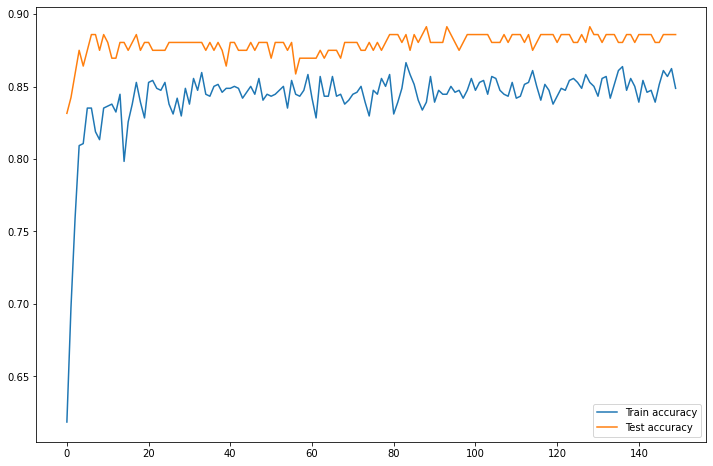

In [ ]:
x1=neural_net_results(X,y)

5/5 [==============================] - 0s 3ms/step - loss: 0.3614 - accuracy: 0.8533
Neural Network score    ========>>> 0.853


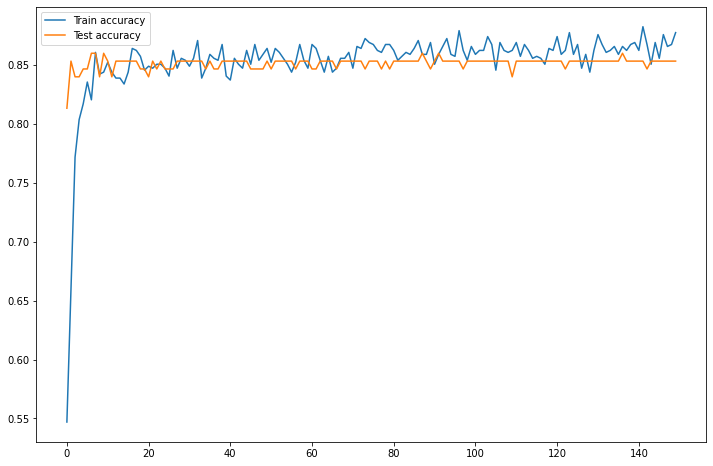

In [ ]:
x2 = neural_net_results(X_eda, y_eda)

In [ ]:
def build_clf():
  # creating the layers of the NN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(32,activation='relu'))
  tf.keras.layers.Dropout(0.1)
  ann.add(tf.keras.layers.Dense(32,activation='relu'))
  tf.keras.layers.Dropout(0.3)
  ann.add(tf.keras.layers.Dense(2, activation='sigmoid'))
  tf.keras.layers.Dropout(0.3)
  ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return ann

model=KerasClassifier(build_fn=build_clf)

params={'batch_size':[10, 20, 50, 25, 32], 
        'nb_epoch':[75,100,200, 300, 400],
           
        }
gs=GridSearchCV(estimator=model, param_grid=params, cv=5)
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X, y)


92/92 [==============================] - 1s 2ms/step - loss: 0.5764 - accuracy: 0.7168


# <h2><strong><em>Pipeline</em></strong></h2>




<h2><strong><em>Fitting the pipeline on Dataset with outliers</em></strong></h2>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

In [ ]:
pipe_dt = Pipeline([('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('KNN', KNeighborsClassifier())])
pipe_xgb = Pipeline([('XGB', XGB(random_state=42))])
pipe_gnb = Pipeline([('GNB', GaussianNB())])
pipe_mlp = Pipeline([('MLP', MLPClassifier(random_state=42))])

In [ ]:
param_range = [2,3,4,5,6,7,8,9,10]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   #'KNN__weights': ['uniform', 'distance','callable'],
                   'KNN__leaf_size':[2,3,4,5,6,7,8],
                   'KNN__p':[1,2,3],
                   #'KNN__metric': ['euclidean', 'manhattan']
                   }]
xgb_param_grid = [{'XGB__learning_rate': [0.019,0.02,0.024,0.025,0.028],
                    'XGB__max_depth': [2,3,5,4],
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': [190,200,210,220,230]}]
mlp_param_grid=[{'MLP__learning_rate_init':[0.001,0.002,0.005,0.01,0.02,0.05,0.1],
                'MLP__hidden_layer_sizes':[100,200,300,400,500],
               'MLP__activation':['relu','tanh','sigmoid'],
               }]

In [ ]:
dt_grid_search = RandomizedSearchCV(estimator=pipe_dt,
        param_distributions=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = RandomizedSearchCV(estimator=pipe_rf,
        param_distributions=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = RandomizedSearchCV(estimator=pipe_knn,
        param_distributions=knn_param_grid,
        scoring='accuracy',
        cv=3)
xgb_grid_search = RandomizedSearchCV(estimator=pipe_xgb,
        param_distributions=xgb_param_grid,
        scoring='accuracy',
        cv=3)
mlp_grid_search = RandomizedSearchCV(estimator=pipe_mlp,
        param_distributions=mlp_param_grid,
        scoring='accuracy',
        cv=3)

In [ ]:
grids = [dt_grid_search, rf_grid_search, knn_grid_search,xgb_grid_search,mlp_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)


In [ ]:
grid_dict = {0: 'Decision Trees', 
             1: 'Random Forest', 2: 'K-Nearest Neighbors', 
             3: 'XGBoost',
             4:'MLPClassifier'}
scores_pipeline=[]
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    scores_pipeline.append(model.score(X_test,y_test))
    print('{} Best Params: {}'.format(grid_dict[i],model.best_params_))

Decision Trees Test Accuracy: 0.8858695652173914
Decision Trees Best Params: {'DT__min_samples_split': 5, 'DT__min_samples_leaf': 2, 'DT__max_depth': 5, 'DT__criterion': 'entropy'}
Random Forest Test Accuracy: 0.875
Random Forest Best Params: {'RF__min_samples_split': 10, 'RF__min_samples_leaf': 8, 'RF__max_depth': 5}
K-Nearest Neighbors Test Accuracy: 0.8478260869565217
K-Nearest Neighbors Best Params: {'KNN__p': 1, 'KNN__n_neighbors': 3, 'KNN__leaf_size': 5}
XGBoost Test Accuracy: 0.9021739130434783
XGBoost Best Params: {'XGB__subsample': 1.0, 'XGB__n_estimators': 210, 'XGB__min_child_weight': 2, 'XGB__max_depth': 3, 'XGB__learning_rate': 0.02}
MLPClassifier Test Accuracy: 0.8804347826086957
MLPClassifier Best Params: {'MLP__learning_rate_init': 0.001, 'MLP__hidden_layer_sizes': 200, 'MLP__activation': 'relu'}


<h2><strong><em>Fitting the pipeline on Dataset without outliers</em></strong></h2>

In [ ]:
pipe_dt_eda = Pipeline([('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf_eda = Pipeline([('RF',RandomForestClassifier(random_state=42))])
pipe_knn_eda = Pipeline([('KNN', KNeighborsClassifier())])
pipe_xgb_eda = Pipeline([('XGB', XGB(random_state=42))])
pipe_gnb_eda = Pipeline([('GNB', GaussianNB())])
pipe_mlp_eda = Pipeline([('MLP', MLPClassifier(random_state=42))])

In [ ]:
param_range = [2,3,4,5,6,7,8,9,10]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   #'KNN__weights': ['uniform', 'distance','callable'],
                   'KNN__leaf_size':[2,3,4,5,6,7,8],
                   'KNN__p':[1,2,3],
                   #'KNN__metric': ['euclidean', 'manhattan']
                   }]
xgb_param_grid = [{'XGB__learning_rate': [0.019,0.02,0.024,0.025,0.028],
                    'XGB__max_depth': [2,3,5,4],
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': [190,200,210,220,230]}]
mlp_param_grid=[{'MLP__learning_rate_init':[0.001,0.002,0.005,0.01,0.02,0.05,0.1],
                'MLP__hidden_layer_sizes':[100,200,300,400,500],
               'MLP__activation':['relu','tanh','sigmoid'],
               }]

In [ ]:
dt_grid_search_eda = RandomizedSearchCV(estimator=pipe_dt_eda,
        param_distributions=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search_eda = RandomizedSearchCV(estimator=pipe_rf_eda,
        param_distributions=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search_eda = RandomizedSearchCV(estimator=pipe_knn_eda,
        param_distributions=knn_param_grid,
        scoring='accuracy',
        cv=3)
xgb_grid_search_eda = RandomizedSearchCV(estimator=pipe_xgb_eda,
        param_distributions=xgb_param_grid,
        scoring='accuracy',
        cv=3)
mlp_grid_search_eda = RandomizedSearchCV(estimator=pipe_mlp_eda,
        param_distributions=mlp_param_grid,
        scoring='accuracy',
        cv=3)

In [ ]:
grids_eda = [dt_grid_search_eda, rf_grid_search_eda, knn_grid_search_eda,xgb_grid_search_eda,mlp_grid_search_eda]
for pipe_eda in grids_eda:
    pipe_eda.fit(X_train_eda,y_train_eda)


In [ ]:
grid_dict = {0: 'Decision Trees', 
             1: 'Random Forest', 2: 'K-Nearest Neighbors', 
             3: 'XGBoost',
             4:'MLPClassifier'}
scores_pipeline_eda=[]
for i, model in enumerate(grids_eda):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test_eda,y_test_eda)))
    scores_pipeline_eda.append(model.score(X_test_eda,y_test_eda))
    print('{} Best Params: {}'.format(grid_dict[i],model.best_params_))

Decision Trees Test Accuracy: 0.8666666666666667
Decision Trees Best Params: {'DT__min_samples_split': 4, 'DT__min_samples_leaf': 8, 'DT__max_depth': 4, 'DT__criterion': 'gini'}
Random Forest Test Accuracy: 0.8733333333333333
Random Forest Best Params: {'RF__min_samples_split': 6, 'RF__min_samples_leaf': 3, 'RF__max_depth': 7}
K-Nearest Neighbors Test Accuracy: 0.9
K-Nearest Neighbors Best Params: {'KNN__p': 3, 'KNN__n_neighbors': 8, 'KNN__leaf_size': 8}
XGBoost Test Accuracy: 0.9
XGBoost Best Params: {'XGB__subsample': 0.5, 'XGB__n_estimators': 200, 'XGB__min_child_weight': 3, 'XGB__max_depth': 5, 'XGB__learning_rate': 0.019}
MLPClassifier Test Accuracy: 0.92
MLPClassifier Best Params: {'MLP__learning_rate_init': 0.005, 'MLP__hidden_layer_sizes': 100, 'MLP__activation': 'tanh'}


# <h2><strong><em>Visualizing the Results of Pipeline</em></strong></h2>




In [ ]:
data2={'Accuracy on Dataset with OUTLIERS':scores_pipeline,'Accuracy on Dataset without OUTLIERS':scores_pipeline_eda}
data_pipe_scores=pd.DataFrame(data2,index=['DecisionTreeClassifier','KNeighbour Classifier','Gradient Boosting Classifier','Gaussian Naive Bayes Classifier','XGBoost Classifier']
)


In [ ]:
data_pipe_scores

,Accuracy on Dataset with OUTLIERS,Accuracy on Dataset without OUTLIERS
DecisionTreeClassifier,0.885870,0.866667
KNeighbour Classifier,0.875000,0.873333
Gradient Boosting Classifier,0.847826,0.900000
Gaussian Naive Bayes Classifier,0.902174,0.900000
XGBoost Classifier,0.880435,0.920000


In [ ]:
fig = px.bar(data_pipe_scores, orientation='h',barmode='group',height=400,width=900)
fig.show()

# <h2><strong><em>Classification Report of Dataset with Outliers</em></strong></h2>



In [ ]:
from sklearn.metrics import classification_report
print('Classification Report of Dataset with Outliers')
target_names = ['HeartDisease', 'No HeartDisease']
for i,model in enumerate(grids):
    print(grid_dict[i])
    print(classification_report(y_test,model.predict(X_test),target_names=target_names))

Classification Report of Dataset with Outliers
Decision Trees
                 precision    recall  f1-score   support

   HeartDisease       0.88      0.87      0.87        82
No HeartDisease       0.89      0.90      0.90       102

       accuracy                           0.89       184
      macro avg       0.88      0.88      0.88       184
   weighted avg       0.89      0.89      0.89       184

Random Forest
                 precision    recall  f1-score   support

   HeartDisease       0.89      0.82      0.85        82
No HeartDisease       0.86      0.92      0.89       102

       accuracy                           0.88       184
      macro avg       0.88      0.87      0.87       184
   weighted avg       0.88      0.88      0.87       184

K-Nearest Neighbors
                 precision    recall  f1-score   support

   HeartDisease       0.84      0.82      0.83        82
No HeartDisease       0.86      0.87      0.86       102

       accuracy                          

# <h2><strong><em>Classification Report of Dataset without Outliers</em></strong></h2>




In [ ]:
from sklearn.metrics import classification_report
print('Classification Report of Dataset without Outliers')
target_names = ['HeartDisease', 'No HeartDisease']
for i,model in enumerate(grids_eda):
    print(grid_dict[i])
    print(classification_report(y_test_eda,model.predict(X_test_eda),target_names=target_names))

Classification Report of Dataset without Outliers
Decision Trees
                 precision    recall  f1-score   support

   HeartDisease       0.88      0.86      0.87        78
No HeartDisease       0.85      0.88      0.86        72

       accuracy                           0.87       150
      macro avg       0.87      0.87      0.87       150
   weighted avg       0.87      0.87      0.87       150

Random Forest
                 precision    recall  f1-score   support

   HeartDisease       0.93      0.82      0.87        78
No HeartDisease       0.83      0.93      0.88        72

       accuracy                           0.87       150
      macro avg       0.88      0.88      0.87       150
   weighted avg       0.88      0.87      0.87       150

K-Nearest Neighbors
                 precision    recall  f1-score   support

   HeartDisease       0.96      0.85      0.90        78
No HeartDisease       0.85      0.96      0.90        72

       accuracy                       

# <h2><strong><em>Confusion Matrices</em></strong></h2>




In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrices=[]
for i,model in enumerate(grids):
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    cf_matrices.append(cf_matrix)
cf_matrices_eda=[]
for i,model in enumerate(grids_eda):
    cf_matrix = confusion_matrix(y_test_eda, model.predict(X_test_eda))
    cf_matrices_eda.append(cf_matrix)

In [ ]:
def plot_confusion_matrix(matrix1,matrix2,model):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5))
    sns.heatmap(matrix1,ax=ax1,annot=True,cmap="Blues")
    sns.heatmap(matrix2,ax=ax2,annot=True,cmap="Blues")
    ax1.set_title('Without Outliers')
    ax2.set_title('With Outliers')
    ax1.set_xlabel('\nPredicted Values')
    ax1.set_ylabel('Actual Values ');
    ax1.xaxis.set_ticklabels(['False','True'])
    ax1.yaxis.set_ticklabels(['False','True'])
    ax2.set_xlabel('\nPredicted Values')
    ax2.set_ylabel('Actual Values ');
    ax2.xaxis.set_ticklabels(['False','True'])
    ax2.yaxis.set_ticklabels(['False','True'])
    fig.suptitle('Confusion matrix for'+ model)
    plt.show()

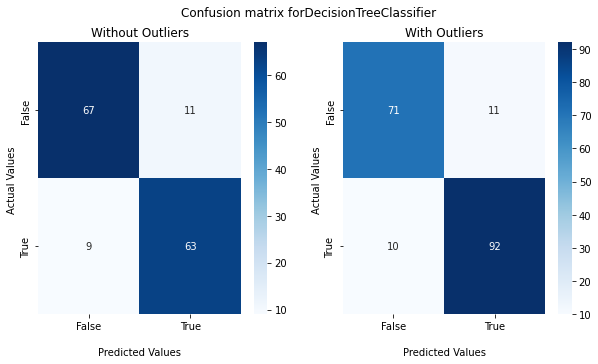

In [ ]:
plot_confusion_matrix(cf_matrices_eda[0],cf_matrices[0],"DecisionTreeClassifier")

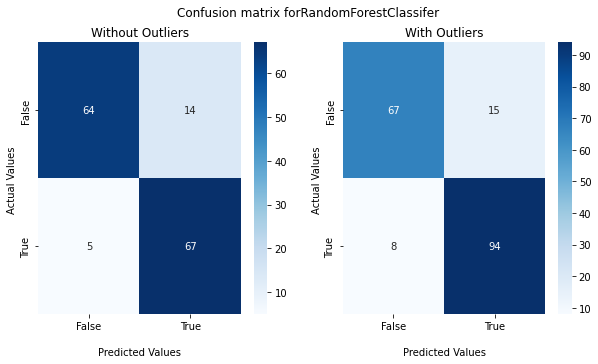

In [ ]:
plot_confusion_matrix(cf_matrices_eda[1],cf_matrices[1],"RandomForestClassifer")

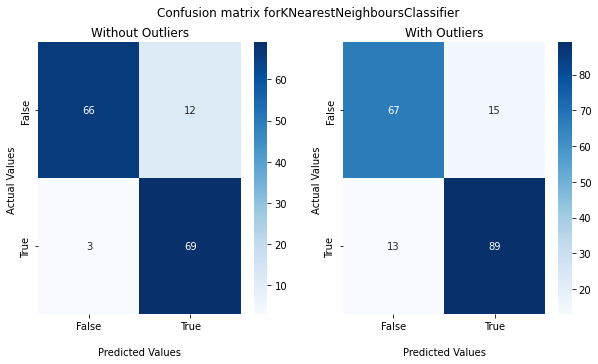

In [ ]:
plot_confusion_matrix(cf_matrices_eda[2],cf_matrices[2],"KNearestNeighboursClassifier")

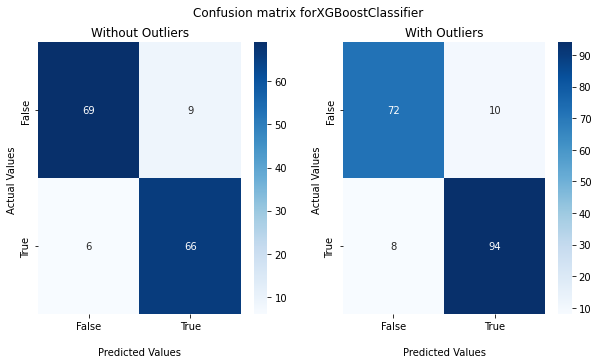

In [ ]:
plot_confusion_matrix(cf_matrices_eda[3],cf_matrices[3],"XGBoostClassifier")

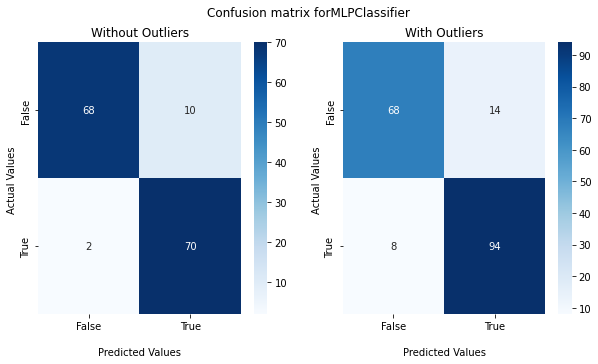

In [ ]:
plot_confusion_matrix(cf_matrices_eda[4],cf_matrices[4],"MLPClassifier")

#<h2><strong><em>ROC & AUC CURVES</em></strong></h2>




In [ ]:
from sklearn.metrics import roc_curve,auc
fprs=[]
tprs=[]
thresholds=[]

for i,model in enumerate(grids):    
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    fprs.append(fpr)
    tprs.append(tpr)
    thresholds.append(threshold)
    
fprs_eda=[]
tprs_eda=[]
thresholds_eda=[]

for i,model in enumerate(grids_eda):    
    fpr, tpr, threshold = roc_curve(y_test_eda, model.predict_proba(X_test_eda)[:,1])
    fprs_eda.append(fpr)
    tprs_eda.append(tpr)
    thresholds_eda.append(threshold)


In [ ]:
def plot_roc_curve(fpr, tpr,fpr_eda,tpr_eda,model):
    plt.plot(fpr, tpr, color='red', label='ROC Curve for Dataset with Outlier')
    plt.plot(fpr_eda, tpr_eda, color='blue', label='ROC Curve for Dataset without Outlier')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve for '+model)
    plt.legend()
    plt.show()

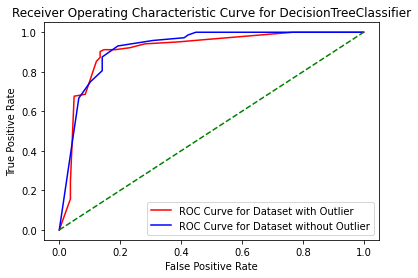

In [ ]:
plot_roc_curve(fprs[0],tprs[0],fprs_eda[0],tprs_eda[0],"DecisionTreeClassifier")

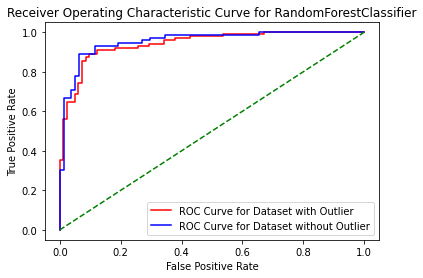

In [ ]:
plot_roc_curve(fprs[1],tprs[1],fprs_eda[1],tprs_eda[1],"RandomForestClassifier")

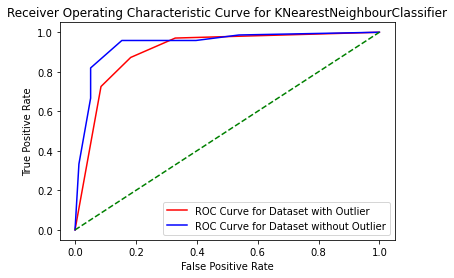

In [ ]:
plot_roc_curve(fprs[2],tprs[2],fprs_eda[2],tprs_eda[2],"KNearestNeighbourClassifier")

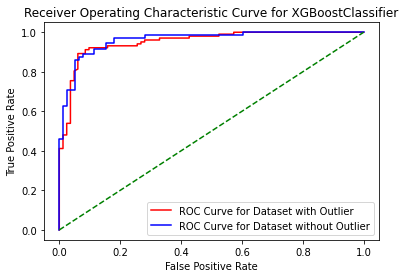

In [ ]:
plot_roc_curve(fprs[3],tprs[3],fprs_eda[3],tprs_eda[3],"XGBoostClassifier")

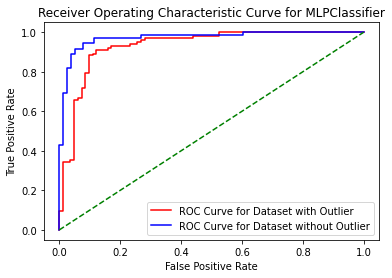

In [ ]:
plot_roc_curve(fprs[4],tprs[4],fprs_eda[4],tprs_eda[4],"MLPClassifier")

# <h2><strong><em>ROC CURVE COMPARING ALL THE MODELS</em></strong></h2>




In [ ]:
colors=['red','yellow','blue','pink','orange']
def plot_roc_curve1(fpr, tpr):  
    plt.figure(figsize=(10,7))
    for i in range(len(colors)):  
        plt.plot(fpr[i], tpr[i], color=colors[i], label=grid_dict[i])
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve Comparing all Models')
    plt.legend()
    
    plt.show()

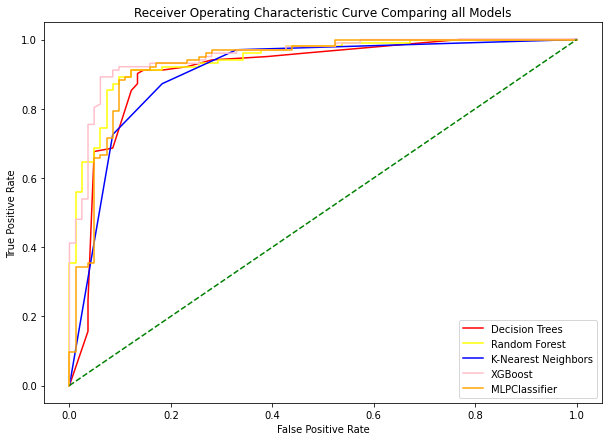

In [ ]:
plot_roc_curve1(fprs,tprs)